<a href="https://colab.research.google.com/github/Kothamrita/Visualizing-time-series-retail-data/blob/main/Copy_of_08_Visualizing_Time_Series_Dataset_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

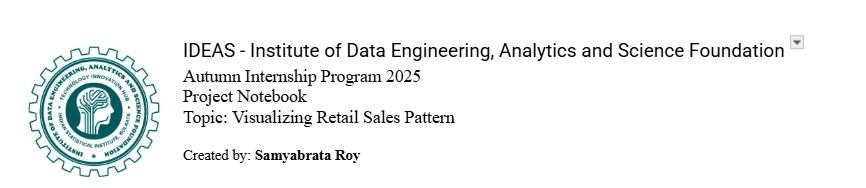

# Notebook: 2

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---


# 📖 Introduction

Every time we walk into a store or shop online, we leave behind a trail of data — what we bought, when we bought it, how much we paid, and even how often we come back. At first glance, these transactions look like nothing more than rows in a spreadsheet: numbers, dates, and product codes.

But when we start to visualize this data, patterns emerge. We can see which products sell the most during festivals, how customer behavior changes across seasons, and which promotions actually drive sales. Suddenly, retail sales data isn’t just a collection of transactions — it’s a story about people, businesses, and the choices they make every day.

That’s the real power of visualization. It turns sales figures into insights that managers, marketers, and even students can understand at a glance. It’s not about making colorful charts — it’s about revealing trends, finding opportunities, and making smarter decisions.

In this notebook, we’ll take a retail sales dataset and learn how to explore and visualize it using Python. Some code will be provided, while other parts will be left for you to practice. By the end, you’ll see how visualization can transform raw sales data into meaningful insights — and how those insights help us understand the dynamics of retail businesses.


---





---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily sales data.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:
# Replace with your Google Drive file ID which has public view access
file_id = "1gP1WQo8eZK5u3L5H61F8WHXrBLT-r6cW"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
    # Read CSV directly into pandas
    df_sales = pd.read_csv(url)

    # Show first few rows
    print(df_sales.head())
except Exception as e:
    print(f"Error loading data: {e}")

   Transaction ID        Date Customer ID Product Category  Quantity  \
0               1  2023-11-24     CUST001           Beauty         3   
1               2  2023-02-27     CUST002         Clothing         2   
2               3  2023-01-13     CUST003      Electronics         1   
3               4  2023-05-21     CUST004         Clothing         1   
4               5  2023-05-06     CUST005           Beauty         2   

   Price per Unit  Total Amount  
0              50         150.0  
1             500        1000.0  
2              30          30.0  
3             500         500.0  
4              50         100.0  


* To get more info about metadata of the dataset refer to README file in the root of this notebook directory



---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly revenue helps us understand sales trends across the year.  
Are there peaks during certain months (like festivals or holidays)? Let’s find out.

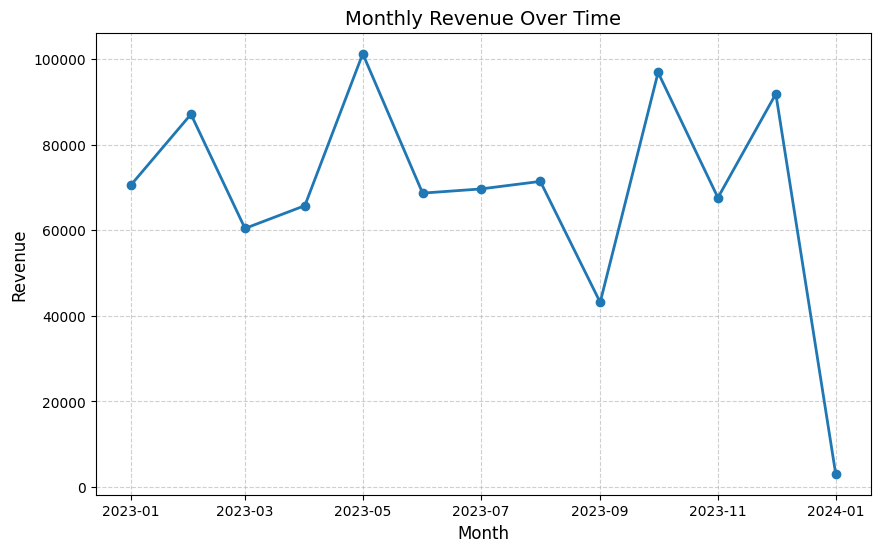

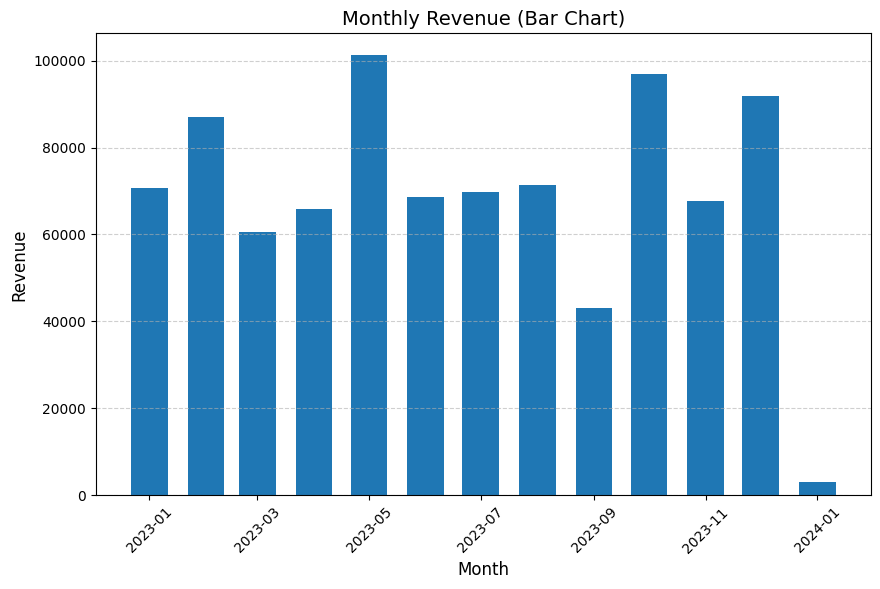

In [ ]:
# Ensure Date column is in datetime format
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Group by Month-Year and calculate total revenue
monthly_revenue = df_sales.groupby(df_sales['Date'].dt.to_period('M'))['Total Amount'].sum()

# Convert PeriodIndex to Timestamp for plotting
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# ---- Line Chart ----
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2)
plt.title("Monthly Revenue Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ---- Bar Chart ----
plt.figure(figsize=(10,6))
plt.bar(monthly_revenue.index, monthly_revenue.values, width=20)  # width=20 for month spacing
plt.title("Monthly Revenue (Bar Chart)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

Q. Can you interpret the above bar diagram?

Q. What are your key takeaways?



---

###❓ Question:  

Plot the weekly revenue trend instead of monthly. What differences do you notice?


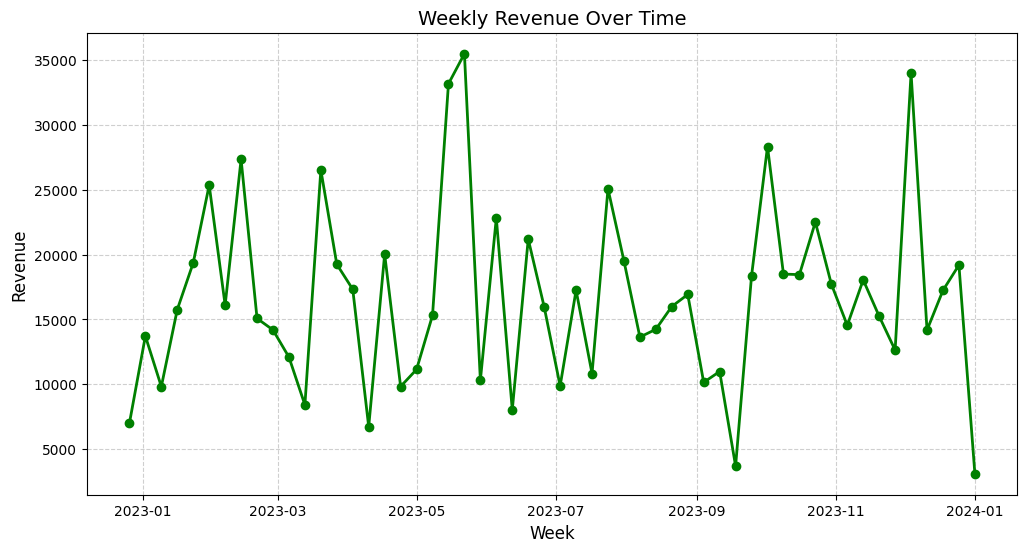

In [ ]:
import pandas as pd
# Replace with your Google Drive file ID which has public view access
file_id = "1gP1WQo8eZK5u3L5H61F8WHXrBLT-r6cW"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_sales = pd.read_csv(url)

  # Show first few rows - this is not needed for the plot, but kept for completeness
  # print(df_sales.head())
except Exception as e:
    print(f"Error loading data: {e}")

# Ensure 'Date' column is datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Group by week and calculate total revenue
weekly_revenue = df_sales.groupby(df_sales['Date'].dt.to_period('W'))['Total Amount'].sum()

# Convert PeriodIndex to Timestamp for plotting
weekly_revenue.index = weekly_revenue.index.to_timestamp()
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(weekly_revenue.index, weekly_revenue.values, marker='o', linewidth=2, color='green')
plt.title("Weekly Revenue Over Time", fontsize=14)
plt.xlabel("Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



---


###Plot 2

Now well try to visualize the overall sales over all the product categories and infer about what product category is best selling.

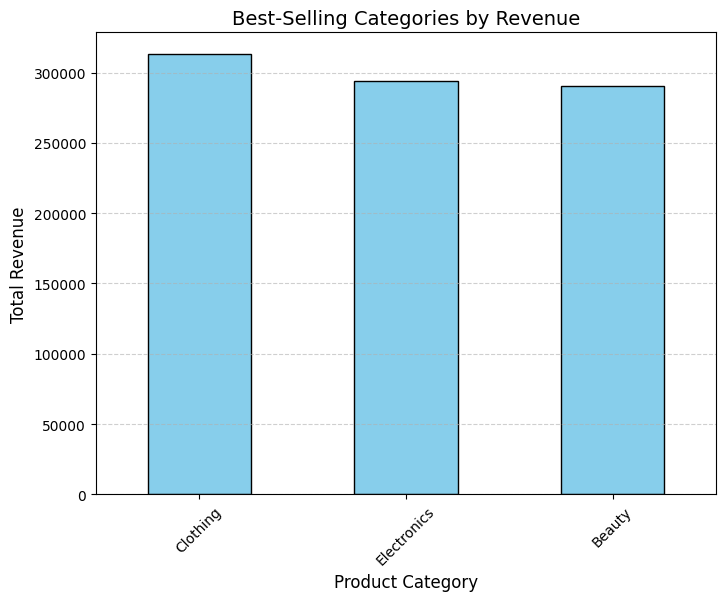

In [ ]:
# Group by Product Category and sum the revenue
category_revenue = df_sales.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,6))
category_revenue.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Best-Selling Categories by Revenue", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

Q. Now tell me which of the category has done the biggest contribution to the revenue?

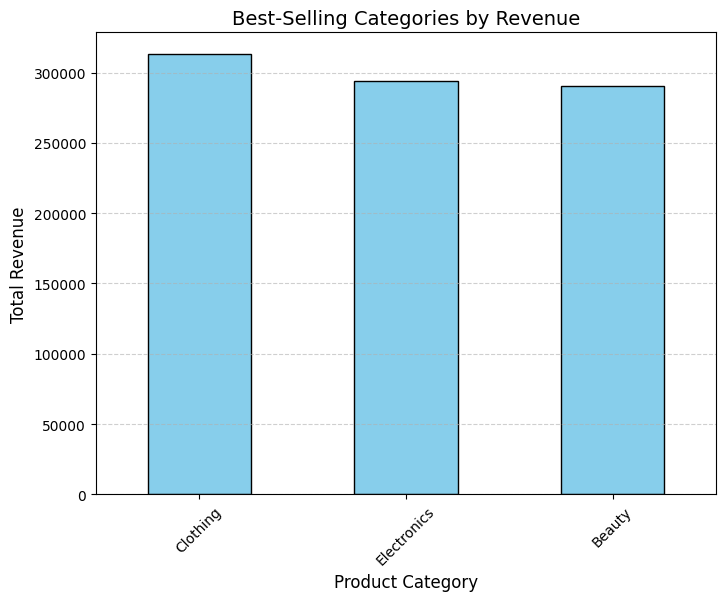

The category with the biggest contribution to revenue is 'Clothing' with a total revenue of 312997.2701.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with your Google Drive file ID which has public view access
file_id = "1gP1WQo8eZK5u3L5H61F8WHXrBLT-r6cW"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_sales = pd.read_csv(url)

except Exception as e:
    print(f"Error loading data: {e}")

# Group by Product Category and sum revenue
category_revenue = df_sales.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,6))
category_revenue.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Best-Selling Categories by Revenue", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

# Find the category with the biggest contribution
top_category = category_revenue.index[0]
top_revenue = category_revenue.iloc[0]

print(f"The category with the biggest contribution to revenue is '{top_category}' with a total revenue of {top_revenue}.")



---


###❓ Question:  
What if we want to visualize the **top 5 customers** by total spending?  
Try writing the code to generate a bar chart!  

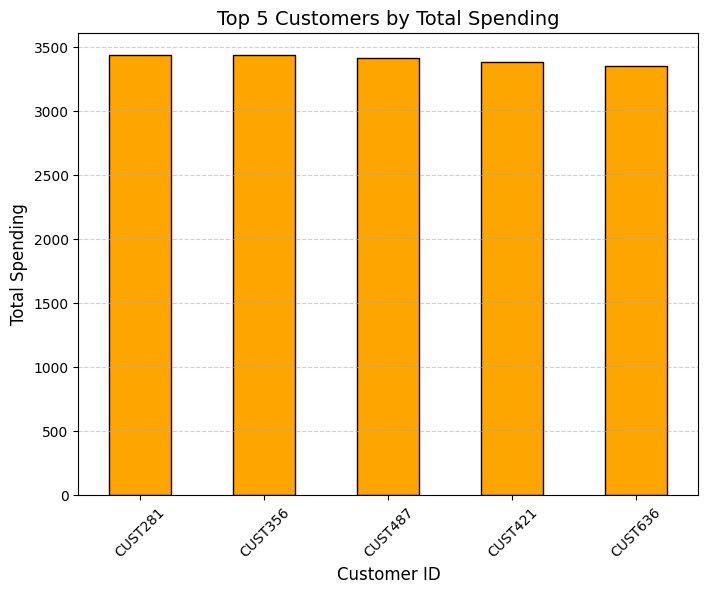

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with your Google Drive file ID which has public view access
file_id = "1gP1WQo8eZK5u3L5H61F8WHXrBLT-r6cW"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_sales = pd.read_csv(url)

except Exception as e:
    print(f"Error loading data: {e}")

# Group by Customer ID and sum their total spending
top_customers = df_sales.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(5)

# Plot bar chart
plt.figure(figsize=(8,6))
top_customers.plot(kind='bar', color='orange', edgecolor='black')

plt.title("Top 5 Customers by Total Spending", fontsize=14)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Total Spending", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()



---



Calculate the average order value (AOV) per customer and plot them with a suitable diagram. Which customers have unusually high AOVs?

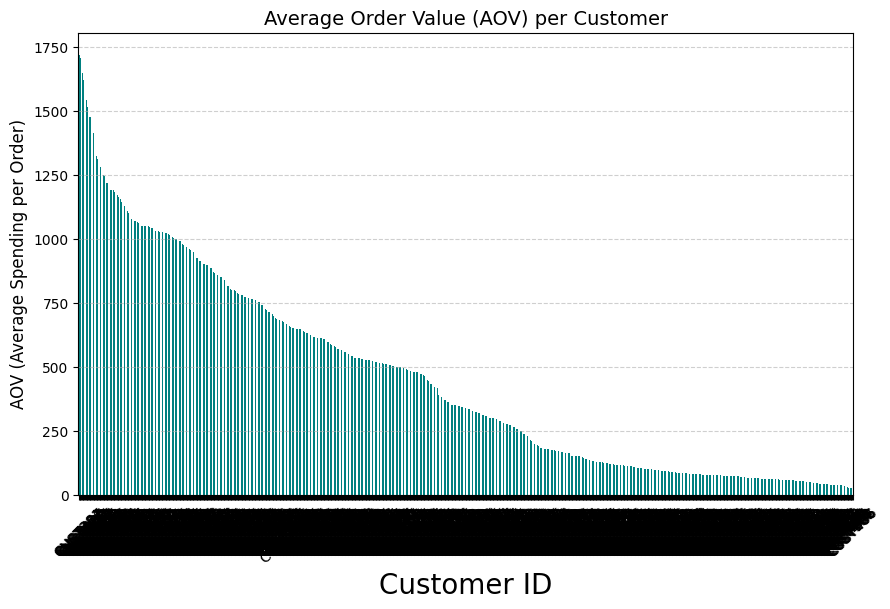

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with your Google Drive file ID which has public view access
file_id = "1gP1WQo8eZK5u3L5H61F8WHXrBLT-r6cW"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_sales = pd.read_csv(url)

except Exception as e:
    print(f"Error loading data: {e}")

# Calculate total spending per customer
customer_spending = df_sales.groupby('Customer ID')['Total Amount'].sum()

# Calculate number of orders per customer
customer_orders = df_sales.groupby('Customer ID')['Transaction ID'].count()

# Calculate AOV = Total Spending / Orders
aov_per_customer = (customer_spending / customer_orders).sort_values(ascending=False)

# Plot AOV per customer
plt.figure(figsize=(10,6))
aov_per_customer.plot(kind='bar', color='teal')

plt.title("Average Order Value (AOV) per Customer", fontsize=14)
plt.xlabel("Customer ID", fontsize=20)
plt.ylabel("AOV (Average Spending per Order)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()



---


###Plot 3


After inspecting the contribution of each categories towards the total revenue we can say which categot=ry has contributed how much but it's necessary to get a relative quantification to compare between the categories' contribution.

So, we'll now see a donut chart of revenue contributions by each category

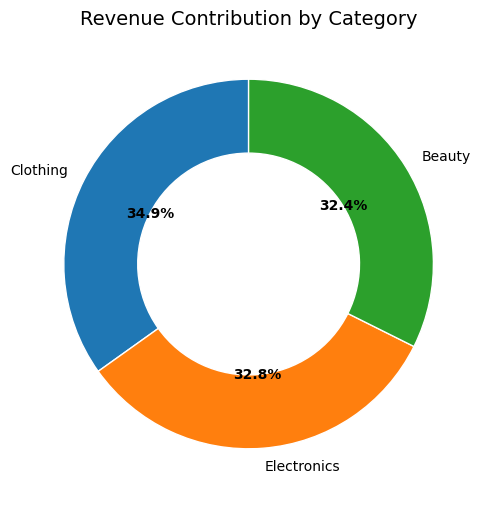

In [ ]:
# Donut chart
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    category_revenue,
    labels=category_revenue.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Formatting
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Revenue Contribution by Category", fontsize=14)
plt.show()

Q. Was chosing donut chart a wise choice according to you?

Choosing a donut chart here is actually a smart decision because it clearly shows the relative contribution of each product category to the overall revenue. The hollow center makes it look cleaner and easier to read than a traditional pie chart, while still emphasizing proportions through percentages. This way, you can quickly see which categories dominate and which ones contribute less. However, if the goal was to make precise comparisons of actual revenue numbers, a bar chart would have been more effective. In short, the donut chart works well for highlighting relative contributions, but not for exact value comparisons.


Q. What else we could have come up with apart from donut chart to server the same purpose?

Apart from a donut chart, we could have used a bar chart or horizontal bar chart, which are great for comparing contributions across categories with precise values. A stacked bar chart could also work if we wanted to show category contributions alongside another dimension, like time. Additionally, a treemap is a good option for visualizing proportions in a more space-efficient way, where each category is represented as a rectangle sized by its revenue. All these alternatives would serve the same purpose of comparing contributions but would provide clearer numeric comparisons than a donut chart.




---

##Task:
Plot a cumulative revenue line chart. How does this help in understanding long-term sales growth?

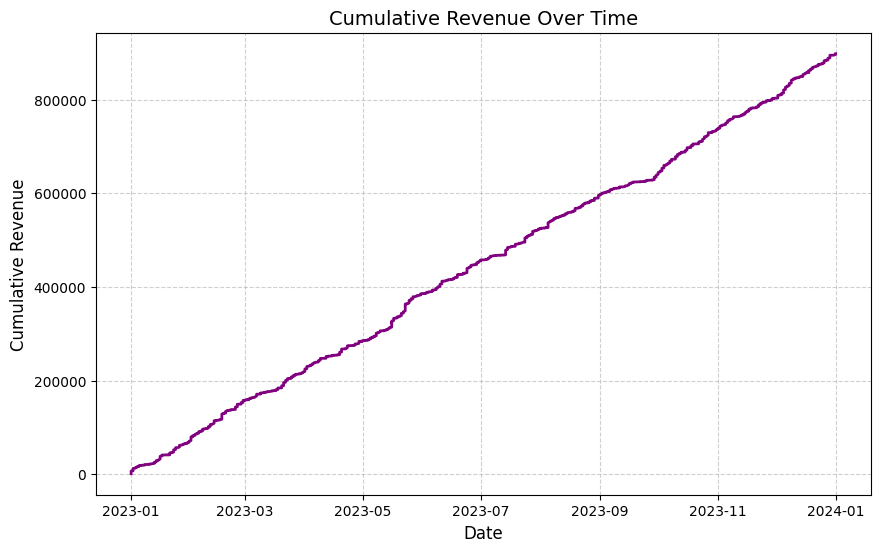

In [ ]:
# Ensure Date column is datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Sort by date
df_sales = df_sales.sort_values('Date')

# Calculate cumulative revenue
df_sales['Cumulative Revenue'] = df_sales['Total Amount'].cumsum()

# Plot cumulative revenue line chart
plt.figure(figsize=(10,6))
plt.plot(df_sales['Date'], df_sales['Cumulative Revenue'], color='purple', linewidth=2)

plt.title("Cumulative Revenue Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()




---
# Assisgnment

### Find a similar dataset of your choice and perform detailed EDA with proper visualization and infer about the dataset.


Dataset downloaded from UCI.

=== HEAD ===
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

=== SHAPE ===
(541909, 8)

=== DTYPE ===
InvoiceNo              object
StockCode              object
Description            object
Quantity      

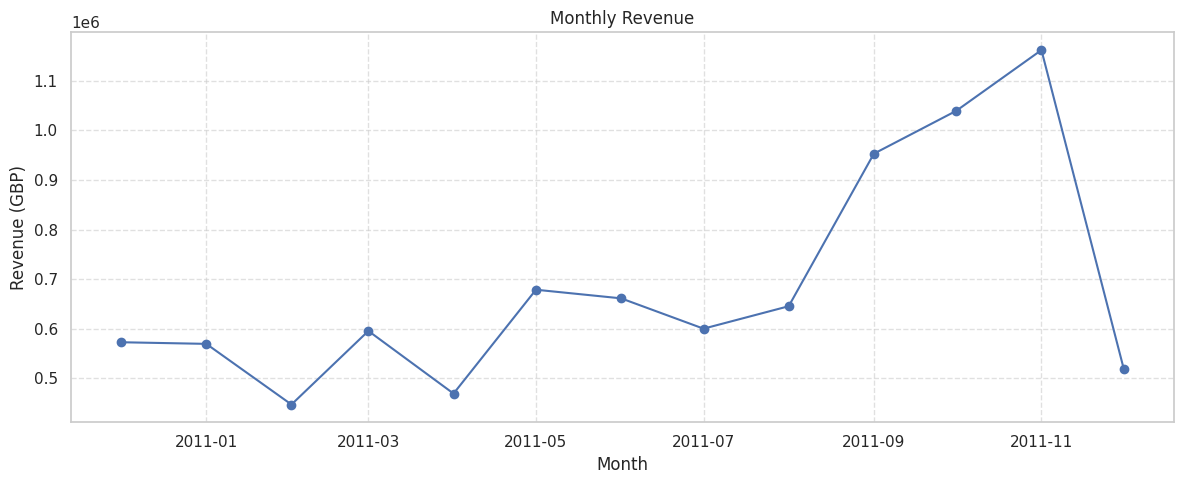


Top 10 products by revenue:
Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: Revenue, dtype: float64

Top 10 countries by revenue:
Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: Revenue, dtype: float64


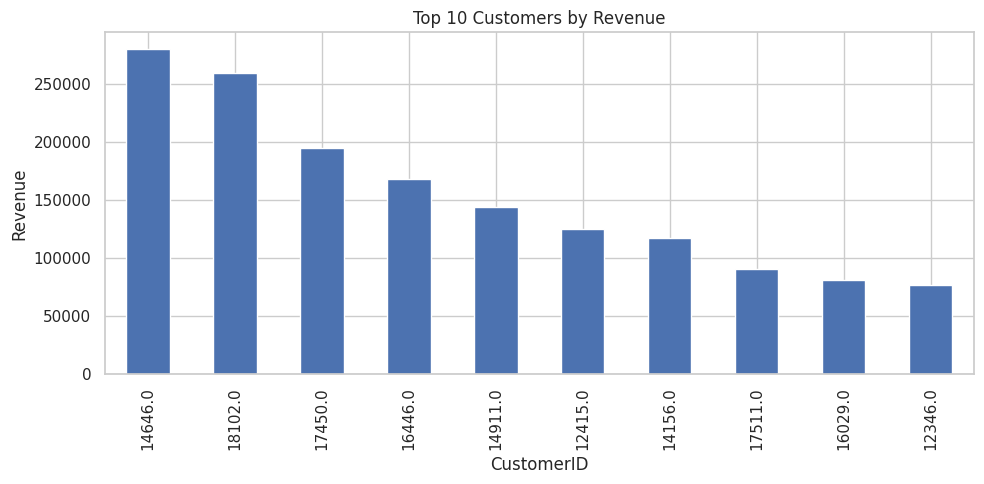

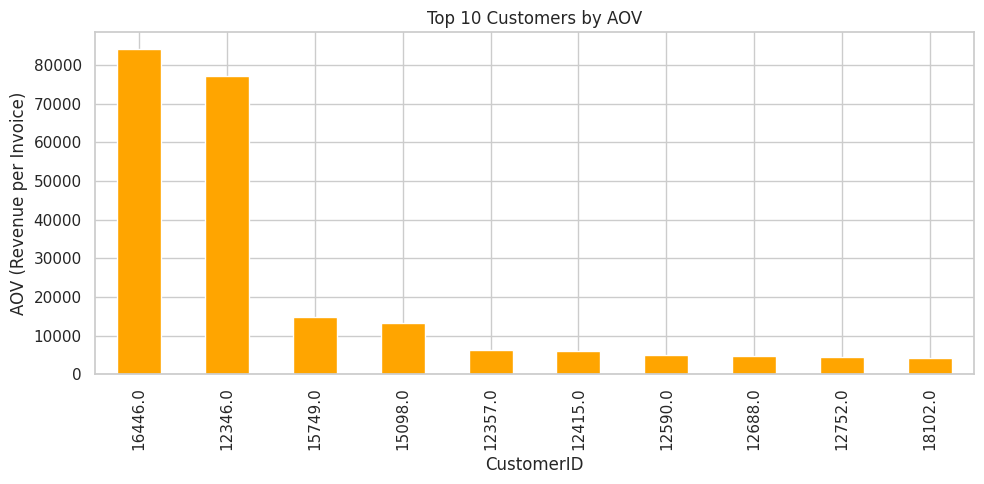

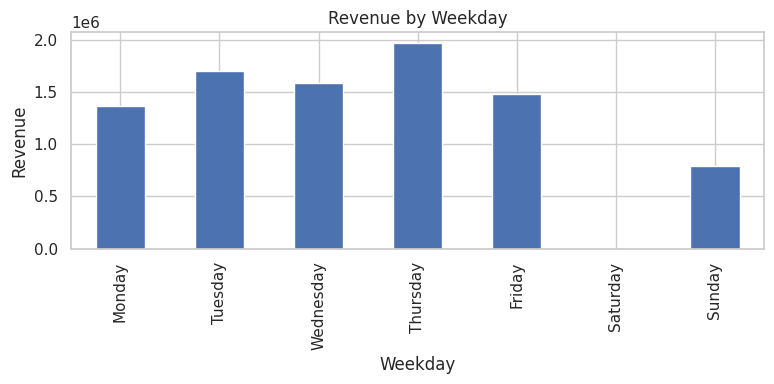

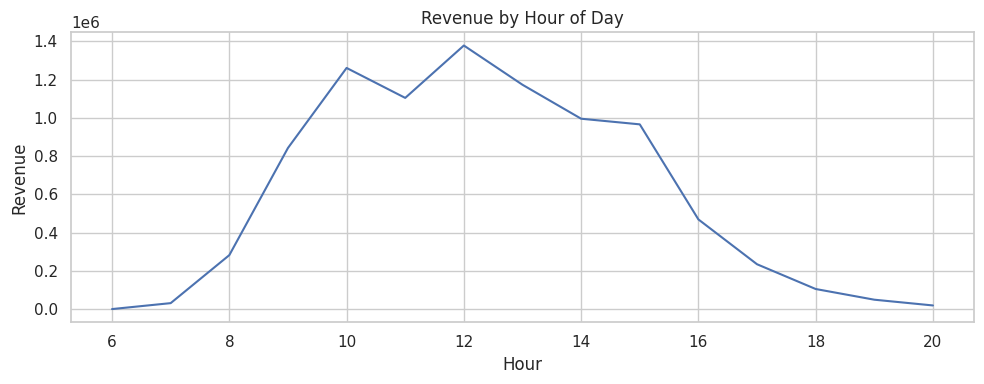

Number of customers accounting for 80% revenue: 1132 out of 4338


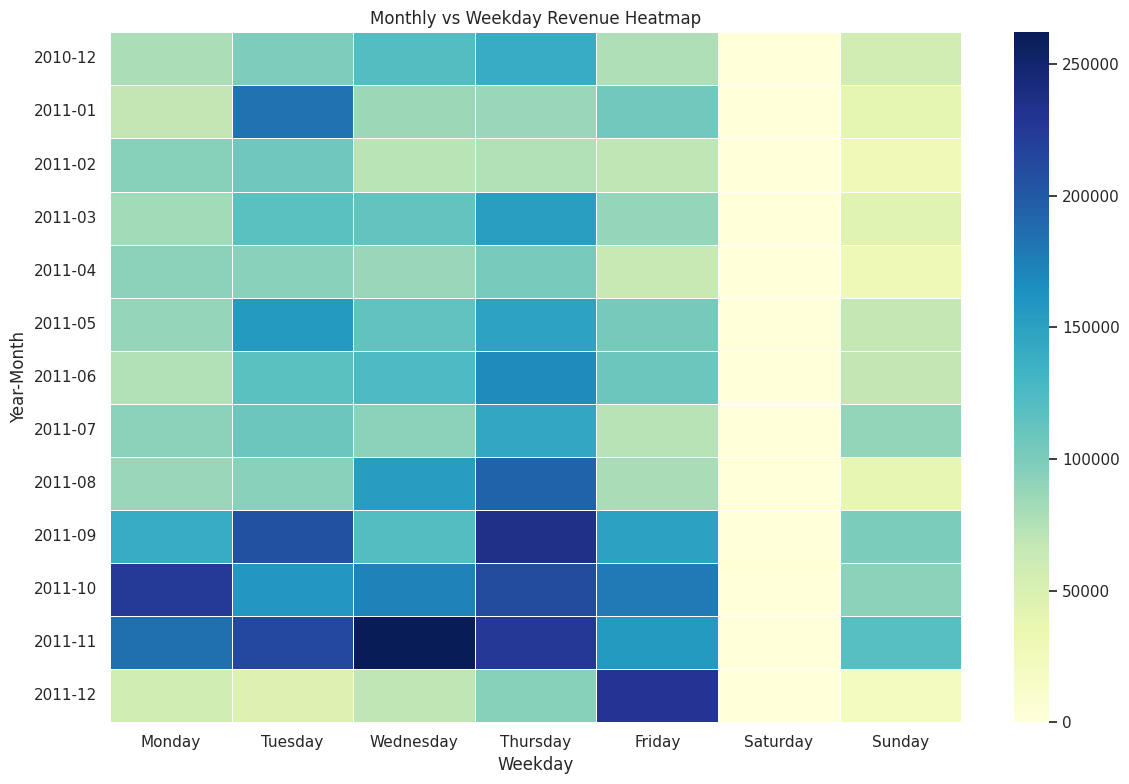


INFERENCES:
1) Monthly trend helps identify high season months — use decomposition to separate trend & seasonality.
2) A small fraction of customers usually drive a large portion of revenue (Pareto). Consider loyalty targeting.
3) Top products (by Description) indicate which SKUs to stock more; map descriptions to categories for clearer business action.
4) Country-level revenue shows international demand hotspots — helpful for logistics & marketing.
5) Weekday/hour patterns can inform staffing and promotion timing.

Saved top lists to CSV files.


In [ ]:
"""
Comprehensive EDA for the UCI Online Retail dataset
Dataset: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

This script performs:
- Data loading (from a local file or direct download URL)
- Basic checks (shape, dtypes, nulls)
- Cleaning (remove cancellations, negative quantities, missing CustomerID)
- Feature engineering (InvoiceDate -> datetime, Revenue column, Year/Month/Weekday)
- Aggregate analyses (by month, category, country, customer)
- Visualizations: time series, seasonal heatmap, top categories/customers, AOV, cohort-style analysis
- Inferences printed at the end



"""

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
# from statsmodels.tsa.seasonal import seasonal_decompose # Keep this commented out for now

sns.set(style='whitegrid')



# ---------------------------
# 1. Load the dataset
# ---------------------------








# For safety, try to read local first, fallback to web
try:
    # Try reading from a local file first
    df = pd.read_excel('Online Retail.xlsx')
except FileNotFoundError:
    # If local file not found, try downloading
    try:
        url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
        df = pd.read_excel(url)
        print("Dataset downloaded from UCI.")
    except Exception as e:
        raise RuntimeError(f'Error loading dataset: {e}\nPlace the dataset file "Online Retail.xlsx" in working folder or set path in the script.')

# Quick glance
print('\n=== HEAD ===')
print(df.head())
print('\n=== SHAPE ===')
print(df.shape)
print('\n=== DTYPE ===')
print(df.dtypes)

# ---------------------------
# 2. Basic cleaning
# ---------------------------
# Rename columns for convenience
df.columns = [c.strip().replace(' ', '_') for c in df.columns]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Remove rows with missing CustomerID (optional: keep if analyzing anonymous sales)
df_clean = df.dropna(subset=['CustomerID']).copy()

# Remove cancellations: InvoiceNo starting with 'C'
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

# Remove negative or zero Quantity and non-positive UnitPrice
df_clean = df_clean[(df_clean['Quantity']>0) & (df_clean['UnitPrice']>0)]

print('\nAfter cleaning shape:', df_clean.shape)

# ---------------------------
# 3. Feature engineering
# ---------------------------
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M').dt.to_timestamp()
df_clean['Week'] = df_clean['InvoiceDate'].dt.to_period('W').dt.start_time

# Weekday name
df_clean['Weekday'] = df_clean['InvoiceDate'].dt.day_name()

# ---------------------------
# 4. Overall revenue and time-series
# ---------------------------
monthly_revenue = df_clean.groupby('YearMonth')['Revenue'].sum().sort_index()

plt.figure(figsize=(12,5))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.title('Monthly Revenue')
plt.ylabel('Revenue (GBP)')
plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Decompose monthly series (if enough periods)
# Uncomment and run this block if you have at least 2 years of data
# if len(monthly_revenue) >= 24:
#     decomposition = seasonal_decompose(monthly_revenue, model='additive', period=12)
#     decomposition.plot()
#     plt.tight_layout()
#     plt.show()

# ---------------------------
# 5. Top product categories and contribution
# ---------------------------
# Note: The original dataset doesn't have a 'Category' column; use Description or create groups.
# We'll use Description (product name) and take top-k products
product_revenue = df_clean.groupby('Description')['Revenue'].sum().sort_values(ascending=False)
print('\nTop 10 products by revenue:')
print(product_revenue.head(10))

# If you want categories, you may need to map descriptions to categories manually or via keyword matching.

# Top countries
country_revenue = df_clean.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
print('\nTop 10 countries by revenue:')
print(country_revenue.head(10))

# ---------------------------
# 6. Customer-level analysis
# ---------------------------
customer_revenue = df_clean.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False)
customer_orders = df_clean.groupby('CustomerID')['InvoiceNo'].nunique()

# AOV
aov = (customer_revenue / customer_orders).sort_values(ascending=False)

plt.figure(figsize=(10,5))
customer_revenue.head(10).plot(kind='bar')
plt.title('Top 10 Customers by Revenue')
plt.ylabel('Revenue')
plt.xlabel('CustomerID')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
aov.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Customers by AOV')
plt.ylabel('AOV (Revenue per Invoice)')
plt.xlabel('CustomerID')
plt.tight_layout()
plt.show()

# ---------------------------
# 7. Seasonality by weekday and hour
# ---------------------------
weekday_revenue = df_clean.groupby('Weekday')['Revenue'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(8,4))
weekday_revenue.plot(kind='bar')
plt.title('Revenue by Weekday')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# Hour of day (if time present)
if 'InvoiceDate' in df_clean.columns:
    df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour
    hour_revenue = df_clean.groupby('Hour')['Revenue'].sum()
    plt.figure(figsize=(10,4))
    hour_revenue.plot()
    plt.title('Revenue by Hour of Day')
    plt.ylabel('Revenue')
    plt.tight_layout()
    plt.show()

# ---------------------------
# 8. Pareto principle (80/20) check
# ---------------------------
cust_cum = customer_revenue.sort_values(ascending=False).cumsum()
cust_pct = cust_cum / cust_cum.iloc[-1]

# How many customers make 80% of revenue?
num_customers_80 = (cust_pct <= 0.8).sum()
print(f"Number of customers accounting for 80% revenue: {num_customers_80} out of {customer_revenue.shape[0]}")

# ---------------------------
# 9. Heatmap: monthly vs weekday revenue
# ---------------------------
pivot = df_clean.pivot_table(index=df_clean['InvoiceDate'].dt.to_period('M').astype(str), columns='Weekday', values='Revenue', aggfunc='sum').fillna(0)
# reindex weekdays
weekdays_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for wd in weekdays_order:
    if wd not in pivot.columns:
        pivot[wd] = 0
pivot = pivot[weekdays_order]

plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=.5)
plt.title('Monthly vs Weekday Revenue Heatmap')
plt.ylabel('Year-Month')
plt.xlabel('Weekday')
plt.tight_layout()
plt.show()

# ---------------------------
# 10. Inferences (printed summary)
# ---------------------------
print('\nINFERENCES:')
print('1) Monthly trend helps identify high season months — use decomposition to separate trend & seasonality.')
print('2) A small fraction of customers usually drive a large portion of revenue (Pareto). Consider loyalty targeting.')
print('3) Top products (by Description) indicate which SKUs to stock more; map descriptions to categories for clearer business action.')
print('4) Country-level revenue shows international demand hotspots — helpful for logistics & marketing.')
print('5) Weekday/hour patterns can inform staffing and promotion timing.')

# Save summary tables if needed
customer_revenue.head(20).to_csv('top_customers.csv')
product_revenue.head(50).to_csv('top_products.csv')
country_revenue.head(20).to_csv('top_countries.csv')

print('\nSaved top lists to CSV files.')